In [1]:

import warnings
warnings.filterwarnings("ignore")


# Data
import pandas as pd


# Visualisation
import seaborn as sns
import plotly.express as px
#from callbacks import register_callbacks
import plotly.graph_objects as go



import matplotlib.pyplot as plt


import statsmodels.formula.api as sm
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import datasets



2023-08-05 13:44:00.012466: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("graduation-data.csv")

In [3]:
df.shape

(401, 12)

In [4]:
df.columns

Index(['Year', 'Zone_EN', 'Coordinates', 'School_Type_EN', 'School_Stage_EN',
       'Gender_EN', 'Unnamed: 6', 'LocalFlag_EN', 'Number of Failed students',
       'Number of Pass students', 'Total Number of Students', 'Graduation %'],
      dtype='object')

In [5]:
df.head()

,Year,Zone_EN,Coordinates,School_Type_EN,School_Stage_EN,Gender_EN,Unnamed: 6,LocalFlag_EN,Number of Failed students,Number of Pass students,Total Number of Students,Graduation %
0,2015,Ajman,"25.244000,55.266140",Public Schools,NaN,Female,NaN,Expat,8,243,251,96.81%
1,2015,Ajman,"25.244000,55.266140",Public Schools,NaN,Female,NaN,Local,20,353,373,94.64%
2,2015,Ajman,"25.244000,55.266140",Public Schools,NaN,Male,NaN,Expat,28,182,210,86.67%
3,2015,Ajman,"25.244000,55.266140",Public Schools,NaN,Male,NaN,Local,23,262,285,91.93%
4,2015,Ajman,"25.244000,55.266140",Private Schools,NaN,Female,NaN,Expat,11,424,435,97.47%


In [6]:
df1 = df.drop(columns=['Unnamed: 6', 'School_Stage_EN'])


In [7]:
df1.shape

(401, 10)

In [8]:
df1.columns

Index(['Year', 'Zone_EN', 'Coordinates', 'School_Type_EN', 'Gender_EN',
       'LocalFlag_EN', 'Number of Failed students', 'Number of Pass students',
       'Total Number of Students', 'Graduation %'],
      dtype='object')

In [9]:
df.columns

Index(['Year', 'Zone_EN', 'Coordinates', 'School_Type_EN', 'School_Stage_EN',
       'Gender_EN', 'Unnamed: 6', 'LocalFlag_EN', 'Number of Failed students',
       'Number of Pass students', 'Total Number of Students', 'Graduation %'],
      dtype='object')

In [10]:
df1 = df.drop(columns=['Unnamed: 6', 'School_Stage_EN','Graduation %'])

In [11]:
df1.to_csv('datacleaned.csv')

In [12]:
df1.columns

Index(['Year', 'Zone_EN', 'Coordinates', 'School_Type_EN', 'Gender_EN',
       'LocalFlag_EN', 'Number of Failed students', 'Number of Pass students',
       'Total Number of Students'],
      dtype='object')

In [13]:
df1['Graduation']=df1['Number of Pass students']/df1['Total Number of Students']

In [14]:
 formula1='Graduation ~  Year + Zone_EN + School_Type_EN + Gender_EN + LocalFlag_EN'
model1=sm.ols(formula=formula1, data=df1)
fitted1=model1.fit()
fitted1.summary()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:             Graduation   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     84.76
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           4.35e-96
Time:                        13:44:03   Log-Likelihood:                 401.85
No. Observations:                 401   AIC:                            -779.7
Df Residuals:                     389   BIC:                            -731.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [16]:
df1.head()


,Year,Zone_EN,Coordinates,School_Type_EN,Gender_EN,LocalFlag_EN,Number of Failed students,Number of Pass students,Total Number of Students,Graduation
0,2015,0,"25.244000,55.266140",3,0,0,8,243,251,0.968127
1,2015,0,"25.244000,55.266140",3,0,1,20,353,373,0.946381
2,2015,0,"25.244000,55.266140",3,1,0,28,182,210,0.866667
3,2015,0,"25.244000,55.266140",3,1,1,23,262,285,0.919298
4,2015,0,"25.244000,55.266140",2,0,0,11,424,435,0.974713


In [17]:
df1 = df1.drop(columns=['Coordinates', 'Number of Failed students', 'Number of Pass students','Total Number of Students' ])

In [18]:
df1


,Year,Zone_EN,School_Type_EN,Gender_EN,LocalFlag_EN,Graduation
0,2015,0,3,0,0,0.968127
1,2015,0,3,0,1,0.946381
2,2015,0,3,1,0,0.866667
3,2015,0,3,1,1,0.919298
4,2015,0,2,0,0,0.974713
...,...,...,...,...,...,...
396,2019,5,2,1,0,1.000000
397,2019,5,1,0,0,1.000000
398,2019,5,1,0,1,0.428571
399,2019,5,1,1,0,0.888889


In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have the DataFrame named 'df1' with your data
# Make sure you have all the predictor variables and the target variable in 'df1'

# Extract the predictor variables (X) and target variable (y)
X = df1[['Year', 'Zone_EN', 'School_Type_EN', 'Gender_EN', 'LocalFlag_EN']].values
y = df1['Graduation'].values

# Scale the predictor variables for better model performance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the architecture of the neural network model
inputs = Input(shape=(5,))
hidden_layer1 = Dense(64, activation='relu')(inputs)
hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)
output_layer = Dense(1)(hidden_layer2)  # No activation function for regression

# Create the model
model = Model(inputs=inputs, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and monitor the training and validation loss
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')




Epoch 1/50
18/18 [==============================] - 1s 9ms/step - loss: 0.3014 - val_loss: 0.1379
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0775 - val_loss: 0.0519
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0377 - val_loss: 0.0310
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0266 - val_loss: 0.0250
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0221 - val_loss: 0.0215
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0196 - val_loss: 0.0204
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0177 - val_loss: 0.0177
Epoch 8/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0164 - val_loss: 0.0164
Epoch 9/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0149 - val_loss: 0.0157
Epoch 10/50
18/18 [==============================] - 0s 5ms/step - loss: 0.0140 - val_loss: 0.0150
Epoch 11/50
18/18 [

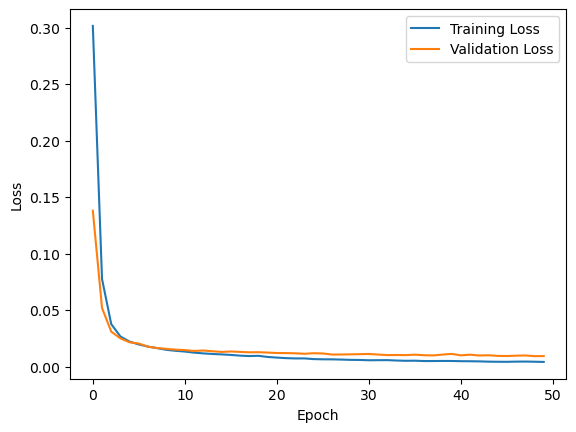

In [25]:
# Plot the learning curve (training loss and validation loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

A loss value of 0.01195456925779581 can be considered good 

The learning curve and monitor in the training and validation losses remain close to each other. they are both low and relatively similar, it suggests that the model generalizes well and is less likely to be overfitting.